<a href="https://colab.research.google.com/github/Megacity1/CartpoleDQN/blob/main/Week%203%20Deep%20RL%202/CartPoleDQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q Network (DQN) for CartPole Using Boltzmann Q Policy
This exercise implements a DQN for CartPole using a Boltzmann Q policy for selecting the actions

In [57]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

In [58]:
!pip install gym

In [62]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
!pip install Adam
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

Implementation of DQN for CartPole, applying policy BoltzmannQPolicy

##Implement DQN with BoltzmannGumbelQPolicy

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 4)                 0         
                                                                 
 dense_69 (Dense)            (None, 16)                80        
                                                                 
 dense_70 (Dense)            (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 6000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   21/6000: episode: 1, duration: 8.238s, episode steps:  21, steps per second:   3, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.381 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   50/6000: episode: 2, duration: 0.364s, episode steps:  29, steps per second:  80, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.552 [0.000, 1.000],  loss: 0.546896, mae: 0.652534, mean_q: 0.414838, mean_eps: 0.400000
   65/6000: episode: 3, duration: 0.194s, episode steps:  15, steps per second:  77, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.133 [0.000, 1.000],  loss: 0.427334, mae: 0.595762, mean_q: 0.423149, mean_eps: 0.400000
   75/6000: episode: 4, duration: 0.162s, episode steps:  10, steps per second:  62, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.429660, mae: 0.654927, mean_q: 0.680041, mean_eps: 0.400000
   85/6000: episode: 5, duration: 0.132s, episode steps:  10, steps per second:  76, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.300 [0.000, 1.000],  loss: 0.426140, mae: 0.710891, mean_q: 0.876172, mean_eps: 0.400

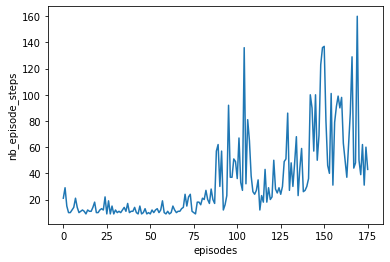

Testing for 20 episodes ...
Episode 1: reward: 66.000, steps: 66
Episode 2: reward: 49.000, steps: 49
Episode 3: reward: 52.000, steps: 52
Episode 4: reward: 42.000, steps: 42
Episode 5: reward: 46.000, steps: 46
Episode 6: reward: 54.000, steps: 54
Episode 7: reward: 69.000, steps: 69
Episode 8: reward: 46.000, steps: 46
Episode 9: reward: 48.000, steps: 48
Episode 10: reward: 76.000, steps: 76
Episode 11: reward: 50.000, steps: 50
Episode 12: reward: 61.000, steps: 61
Episode 13: reward: 56.000, steps: 56
Episode 14: reward: 65.000, steps: 65
Episode 15: reward: 46.000, steps: 46
Episode 16: reward: 42.000, steps: 42
Episode 17: reward: 98.000, steps: 98
Episode 18: reward: 47.000, steps: 47
Episode 19: reward: 63.000, steps: 63
Episode 20: reward: 90.000, steps: 90


In [85]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannGumbelQPolicy
from rl.policy import LinearAnnealedPolicy
from rl.policy import EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent      # import the DQN agent

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=4.,
                               value_min=.4, 
                               value_test=.05,
                               nb_steps=20)
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# add extra layers here
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space

print(model.summary())

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=20,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=6000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)